In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn as sk
import seaborn as sns
import scipy

[20 20 20 20 20]
[ 0.062    0.53418  0.98694  1.91548  4.13422 12.2724 ]


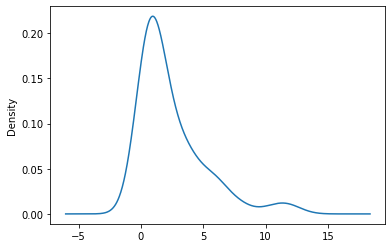

In [2]:
data = np.loadtxt("block7.txt")
size = len(data)
n_bins = 5
df = pd.DataFrame(data, columns=["data"])
df["bins"], bin_edges = pd.qcut(df["data"], q=n_bins, retbins=True)
bin_counts = np.array(df["bins"].value_counts(sort=False))
print(bin_counts)
print(bin_edges)
df["data"].plot.kde()

In [3]:
def get_p_bins(a, bin_edges):
    p_bins = []
    for i_start in range(len(bin_edges)-1):
        bin_start = bin_edges[i_start]
        bin_stop = bin_edges[i_start + 1]
        #print("bin:{}, [{},{}]".format(i_start, bin_start, bin_stop))
        p_bins.append(scipy.stats.expon.cdf(bin_stop, scale=a) - scipy.stats.expon.cdf(bin_start, scale=a))
        #print(p_bins[-1])
    #p_bins = np.array(p_bins) / np.array(p_bins).sum()
    p_bins = np.array(p_bins)
    return p_bins

a_0 = 3.
p_bins = get_p_bins(a_0, bin_edges)
print(bin_counts)
print(bin_edges)
print(p_bins)
print(p_bins.sum())

[20 20 20 20 20]
[ 0.062    0.53418  0.98694  1.91548  4.13422 12.2724 ]
[0.14265322 0.1172348  0.19156993 0.27602375 0.23533788]
0.9628195777712211


In [4]:
test_stat = 0.
for i, bin_count in enumerate(bin_counts):
    test_stat += (bin_count - size*p_bins[i])*(bin_count - size*p_bins[i])/(size*p_bins[i])
    #print(size*p_bins[i])
    
print("Test statistic T={}".format(test_stat))
conf = 0.90
max_t = scipy.stats.chi2.ppf(q=conf,df=n_bins-1)
print("critical T={}".format(max_t))
if test_stat > max_t:
    print("Hypothesis a={} has to be discarded!".format(a_0))
else:
    print("Hypothesis a={} holds up!".format(a_0))

Test statistic T=10.809995312205372
critical T=7.779440339734858
Hypothesis a=3.0 has to be discarded!


In [5]:
def test_stat(a, bin_count, bin_edges):
    p_bins = get_p_bins(a, bin_edges)
    test_stat = 0.
    for i, bin_count in enumerate(bin_counts):
        test_stat += (bin_count - size*p_bins[i])*(bin_count - size*p_bins[i])/(size*p_bins[i])
        #print(size*p_bins[i])
        
    return test_stat
    

In [7]:
opt_a = scipy.optimize.minimize(lambda x: test_stat(x, bin_count, bin_edges), x0=a_0).x
print("optimized a={}".format(opt_a))
opt_test_stat = test_stat(opt_a, bin_count, bin_edges)
print("Test statistic T={}".format(opt_test_stat))
print("critical T={}".format(max_t))
if opt_test_stat > max_t:
    print("Hypothesis a={} has to be discarded!".format(opt_a))
else:
    print("Hypothesis a={} holds up!".format(opt_a))

optimized a=[2.30165607]
Test statistic T=[5.45756998]
critical T=7.779440339734858
Hypothesis a=[2.30165607] holds up!
